<a href="https://colab.research.google.com/github/vinodvicki/Flower_species_classification/blob/main/flower_species_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style('darkgrid')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [11]:
df.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,49


In [ ]:
#fill_columns = ['distance', 'mass', 'orbital_period']
#df[fill_columns]= df[fill_columns].apply(lambda x: x.fillna(x.median ))


<Figure size 1000x800 with 0 Axes>

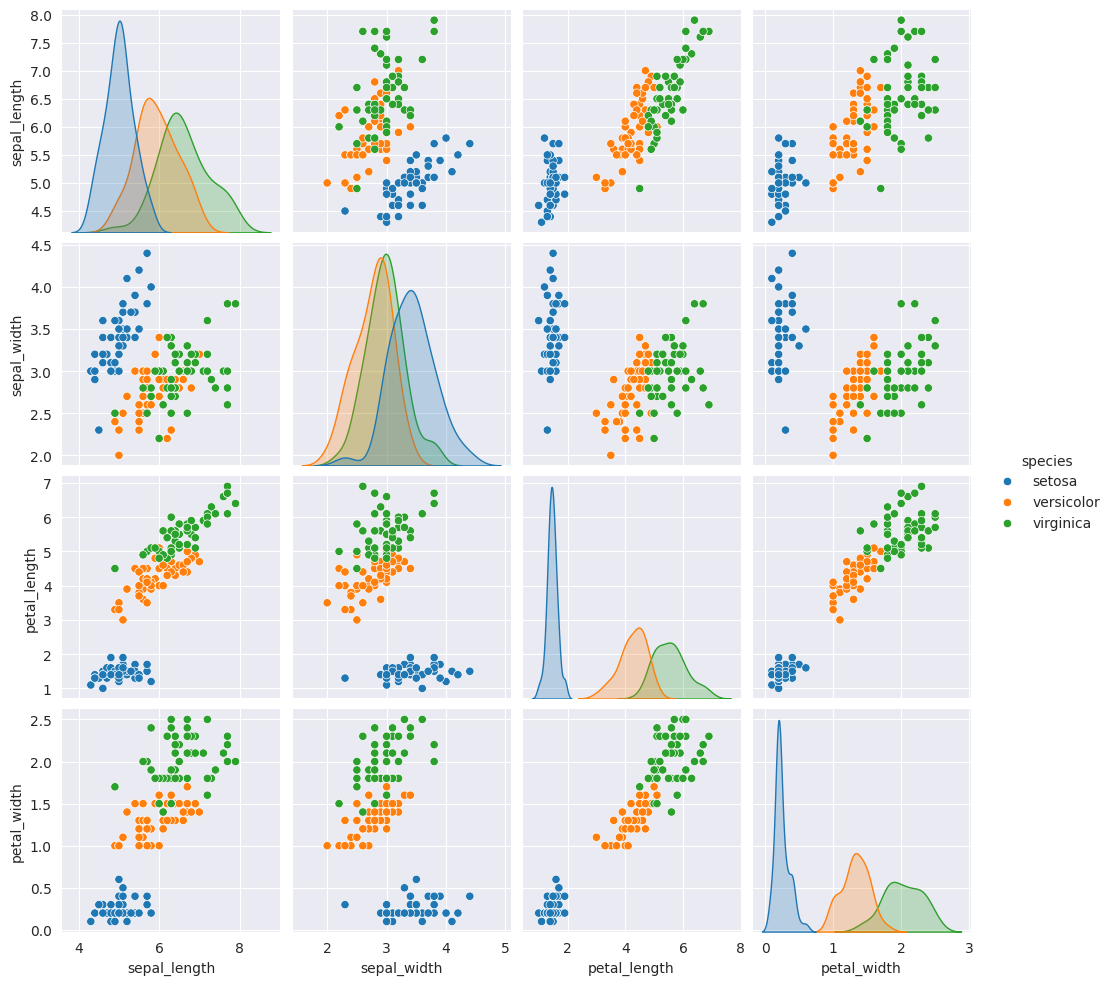

In [12]:
plt.figure(figsize=(10,8))
sns.pairplot(df, hue='species')
plt.show()

In [13]:
#lable encodind
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


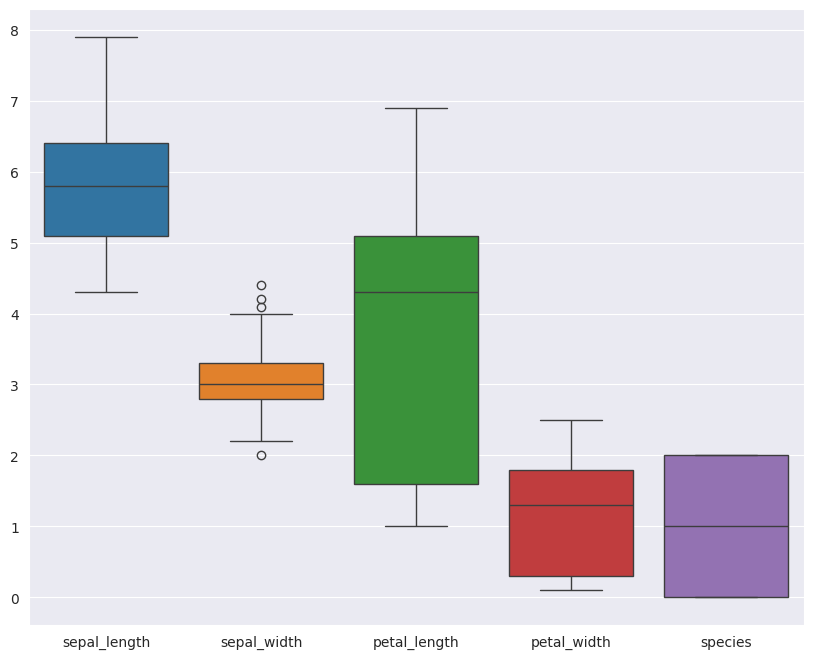

In [16]:
#box plot
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.show()

In [17]:
# independent viable And dependent virable
X = df.drop('species', axis=1)
y = df['species']

In [18]:
# standerdization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(119, 4) (30, 4) (119,) (30,)


In [22]:
# logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
#predict X_test, y_test
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [28]:
# accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
# actual, predict
pd.DataFrame({'actual':y_test, 'predict':y_pred})

,actual,predict
73,1,1
18,0,0
117,2,2
78,1,1
76,1,1
31,0,0
64,1,1
140,2,2
68,1,1
82,1,1
